In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split

## Bias-Variance Tradeoff

In modeling we make the assumption that the data follows some unknown function with some noise:

$$
f(X) + \epsilon
$$

Then we create a model $\hat{f}(X)$ that approximates this model as best it can!
- Note that $\epsilon$ is fixed. It represents a barrier to our predictive capabilities in some sense.

The **Bias** of our model $\hat{f}(X)$ is the expected error of our model:
$$
\text{E}[(f(X) - \hat{f}(X)]
$$
However, we don't know $f(X)$ in practice so we often use the loss of our model against the training set as a stand-in for bias. In other words the bias refers to how well the model is at predicting the target variable.

The **Variance** of our model $\text{Var}[\hat{f}(X)]$ represents how sensitive our model is to perturbations in the data.

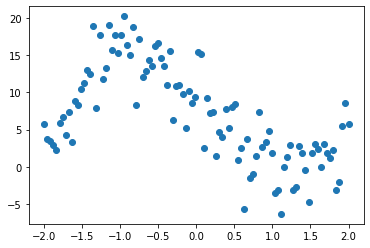

In [2]:
# let's use similar fake nonlinear data as when we discussed under/over fitting
num_pts = 100
X = np.linspace(-2, 2, num_pts)

# noise
epsilon = np.random.normal(0, 3, num_pts)

# degree 3 polynomial
Y = 3*(X-1)*(X+2)*(X-1.5) + epsilon

plt.scatter(x=X, y=Y)
plt.show()

- Since the data is non-linear, a linear model has high *Bias* here. We see that the expected error is quite large.
- The linear model also has low *Variance*. If I perturb the input variable $X$, the output is perturbed in a linear fashion.

7.052281352176759 -3.2914770893101144


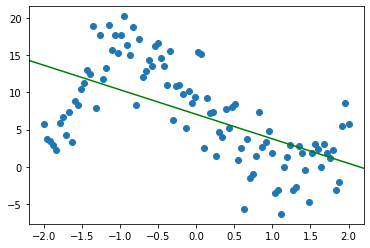

In [3]:
model = sm.OLS(Y, sm.add_constant(X), hasconst=True)
res = model.fit()
b, m = res.params
print(b, m)

# plot the points
plt.scatter(x=X, y=Y)

# plot the line
plt.axline((0, b), slope=m, color='green')
plt.show()

Let's fit a high degree polynomial to the data now.

In [4]:
df = pd.DataFrame({'x':X, 'y':Y})

n = 30

for i in range(n-1):
    df[f'x_{i+2}'] = X**(i+2)
df.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_21,x_22,x_23,x_24,x_25,x_26,x_27,x_28,x_29,x_30
0,-2.000000,5.772932,4.000000,-8.000000,16.000000,-32.000000,64.000000,-128.000000,256.000000,-512.000000,...,-2.097152e+06,4.194304e+06,-8.388608e+06,1.677722e+07,-3.355443e+07,6.710886e+07,-1.342177e+08,2.684355e+08,-5.368709e+08,1.073742e+09
1,-1.959596,3.798334,3.840016,-7.524880,14.745725,-28.895664,56.623826,-110.959821,217.436417,-426.087524,...,-1.366146e+06,2.677095e+06,-5.246024e+06,1.028009e+07,-2.014482e+07,3.947571e+07,-7.735644e+07,1.515874e+08,-2.970500e+08,5.820979e+08
2,-1.919192,3.461443,3.683298,-7.068955,13.566681,-26.037065,49.970125,-95.902261,184.054844,-353.236569,...,-8.820365e+05,1.692797e+06,-3.248803e+06,6.235076e+06,-1.196631e+07,2.296564e+07,-4.407547e+07,8.458929e+07,-1.623431e+08,3.115675e+08
3,-1.878788,2.943198,3.529844,-6.631828,12.459798,-23.409317,43.981142,-82.631236,155.246564,-291.675363,...,-5.641996e+05,1.060011e+06,-1.991536e+06,3.741674e+06,-7.029812e+06,1.320753e+07,-2.481414e+07,4.662051e+07,-8.759004e+07,1.645631e+08
4,-1.838384,2.252965,3.379655,-6.213103,11.422069,-20.998147,38.602654,-70.966495,130.463657,-239.842278,...,-3.574045e+05,6.570467e+05,-1.207904e+06,2.220591e+06,-4.082299e+06,7.504833e+06,-1.379676e+07,2.536375e+07,-4.662830e+07,8.572072e+07


In [5]:
indep_var = 'x'
for i in range(n-1):
    indep_var = indep_var + f' + x_{i+2}'
print(indep_var)

model = ols(formula = f'y ~ {indep_var}', data=df)
res = model.fit()
res.summary()

x + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_10 + x_11 + x_12 + x_13 + x_14 + x_15 + x_16 + x_17 + x_18 + x_19 + x_20 + x_21 + x_22 + x_23 + x_24 + x_25 + x_26 + x_27 + x_28 + x_29 + x_30


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     13.92
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           3.88e-19
Time:                        19:41:24   Log-Likelihood:                -230.74
No. Observations:                 100   AIC:                             523.5
Df Residuals:                      69   BIC:                             604.2
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5439      1.322      8.732      0.000       8.906      14.181
x             -2.0860     11.523     -0.181      0.857     -25.074      20.902
x_2         -227.0834     74.200     -3.060      0.003    -375.108     -79.059
x_3         -162.8196    293.901     -0.554      0.581    -749.136     423.497
x_4         3444.7696   1144.714      3.009      0.004    1161.128    5728.411
x_5         1652.8684   2696.749      0.613      0.542   -3726.999    7032.736
x_6        -2.103e+04   7738.431     -2.717      0.008   -3.65e+04   -5590.570
x_7        -9337.5934   1.23e+04     -0.757      0.452    -3.4e+04    1.53e+04
x_8         6.766e+04   2.86e+04      2.362      0.021    1.05e+04    1.25e+05
x_9         3.039e+04    3.3e+04      0.921      0.360   -3.54e+04    9.62e+04
x_10       -1.318e+05   6.54e+04     -2.014      0.048   -2.62e+05   -1257.715
x_11       -6.058e+04   5.65e+04     -1.073      0.287   -1.73e+05    5.21e+04
x_12        1.681e+05   9.89e+04      1.700      0.094   -2.91e+04    3.65e+05
x_13        7.845e+04   6.53e+04      1.202      0.234   -5.18e+04    2.09e+05
x_14       -1.474e+05   1.03e+05     -1.426      0.158   -3.54e+05    5.88e+04
x_15       -6.883e+04   5.27e+04     -1.305      0.196   -1.74e+05    3.64e+04
x_16        9.132e+04   7.68e+04      1.189      0.239   -6.19e+04    2.45e+05
x_17          4.2e+04   3.03e+04      1.387      0.170   -1.84e+04    1.02e+05
x_18        -4.05e+04   4.11e+04     -0.985      0.328   -1.23e+05    4.16e+04
x_19       -1.802e+04   1.24e+04     -1.448      0.152   -4.28e+04    6800.801
x_20        1.286e+04   1.59e+04      0.808      0.422   -1.89e+04    4.46e+04
x_21        5423.5005   3628.966      1.495      0.140   -1816.088    1.27e+04
x_22       -2884.8289   4402.223     -0.655      0.514   -1.17e+04    5897.366
x_23       -1120.3755    733.247     -1.528      0.131   -2583.164     342.413
x_24         443.1248    849.530      0.522      0.604   -1251.640    2137.890
x_25         151.3735     97.568      1.551      0.125     -43.269     346.016
x_26         -43.8561    108.539     -0.404      0.687    -260.386     172.674
x_27         -12.0481      7.688     -1.567      0.122     -27.385       3.288
x_28           2.4749      8.248      0.300      0.765     -13.980      18.930
x_29           0.4284      0.272      1.577      0.119      -0.114       0.970
x_30          -0.0585      0.282     -0.207      0.836      -0.621       0.504
==============================================================================
Omnibus:                        1.459   Durbin-Watson:                   2.839
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                1.215
Skew:                          -0.270   Prob(JB):                        0.545
Kurtosis:                       3.013   Cond. No.                     1.16e+14
==

- Note the "squiggliness" of the model. This model might have decent Bias, but it has high variance as well.
- If we perturb the input variable left or right we might drastically change the model output.

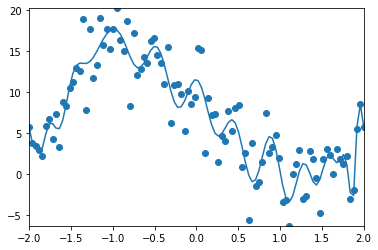

In [6]:
plt.scatter(x=X, y=Y)

# plot the polynomial
coefs = list(res.params)
coefs.reverse()
poly = [np.polyval(coefs, i) for i in X]
plt.plot(X, poly)

plt.xlim(min(X), max(X))
plt.ylim(min(Y), max(Y))
plt.show()

The **Bias-Variance Tradeoff** is the trade-off between reducing Bias and reducing Variance.
- Often to reduce Bias you have to fit the model more closely to the training data. This might result in a high Variance.
- Often to reduce Variance you need to make the model less sensitive to perturbations. This might result in a higher Bias since you are fitting the training data less closely.

This tradeoff relates to the underfitting vs. overfitting problem. Often high Bias implies underfitting and high Variance implies overfitting.
- The job of the model-er is often to find that "sweet spot" in between!

Techniques that center around reducing the Variance of a model or attempting to reduce the model from overfitting to the training are types of **Regularization**.

## Ridge and Lasso Regression
- These two regularization methods concern the *size* of the coefficients in linear or logistic regression.
- Note the size of the coefficients in the polynomial regression above!

Idea behind reducing the size of the cofficients:
- Makes it harder for the model to overfit, less able to be "squiggly"
- Reduces the effect of multicolinearity, often one variable will "take over" the other.

In [7]:
# let's take a look at the taxi data
df_taxis = sns.load_dataset('taxis')
df_taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [8]:
# for fun I'm going to make a new variable
df_taxis['distance_ft'] = df_taxis['distance'] * 5280
df_taxis[['distance', 'distance_ft']].describe()

,distance,distance_ft
count,6433.000000,6433.000000
mean,3.024617,15969.976807
std,3.827867,20211.137765
min,0.000000,0.000000
25%,0.980000,5174.400000
50%,1.640000,8659.200000
75%,3.210000,16948.800000
max,36.700000,193776.000000


In [10]:
# predict distance from total fare
model = ols(formula = 'distance_ft ~ total + passengers', data=df_taxis)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            distance_ft   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 1.449e+04
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:53:10   Log-Likelihood:                -67416.
No. Observations:                6433   AIC:                         1.348e+05
Df Residuals:                    6430   BIC:                         1.349e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8415.8083    224.713    -37.451      0.000   -8856.321   -7975.296
total       1323.5837      7.774    170.254      0.000    1308.344    1338.824
passengers   -80.6016     89.223     -0.903      0.366    -255.509      94.306
==============================================================================
Omnibus:                     6966.038   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2963579.447
Skew:                          -4.832   Prob(JB):                         0.00
Kurtosis:                     107.704   Cond. No.                         50.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Why are the values so large?
- Why might it be a bad idea to limit the size of the coefficients here?

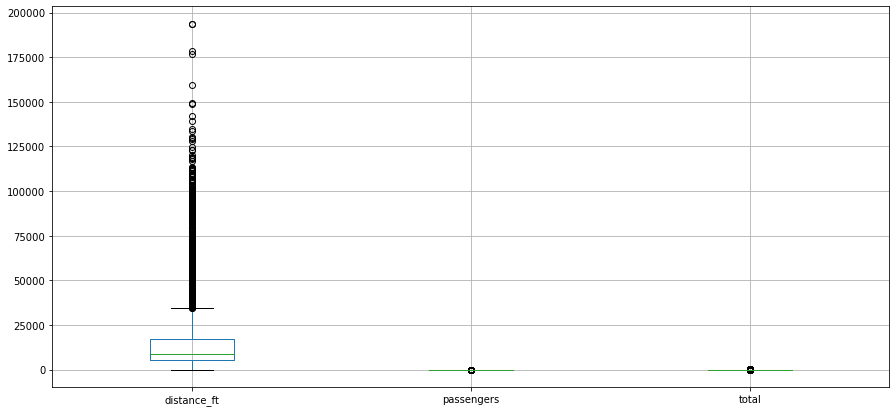

In [11]:
df_taxis[['distance_ft', 'passengers', 'total']].boxplot(figsize=(15,7)) 
plt.show()

Often **Normalizing** the data prevents issues such as this. It also may drastically improve your model as variables at different scales can make numerical optimization techniques less effective.

To normalize a variable $X$ we create a new variable

$$
X' = \frac{X - \mu}{\sigma}
$$

where $\mu, \sigma$ are the mean and standard deviation of $X$ respectively.

In [12]:
df = df_taxis.copy()[['distance', 'distance_ft', 'passengers', 'total']]
df_taxis_normalized = (df - df.mean()) / df.std()
df_taxis_normalized.describe()

,distance,distance_ft,passengers,total
count,6.433000e+03,6.433000e+03,6.433000e+03,6.433000e+03
mean,3.823746e-15,8.914100e-16,-8.727495e-17,-7.221061e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-7.901572e-01,-7.901572e-01,-1.278694e+00,-1.246260e+00
25%,-5.341400e-01,-5.341400e-01,-4.479689e-01,-5.586302e-01
50%,-3.617202e-01,-3.617202e-01,-4.479689e-01,-3.154263e-01
75%,4.842989e-02,4.842989e-02,3.827558e-01,1.289998e-01
max,8.797428e+00,8.797428e+00,3.705655e+00,1.131348e+01


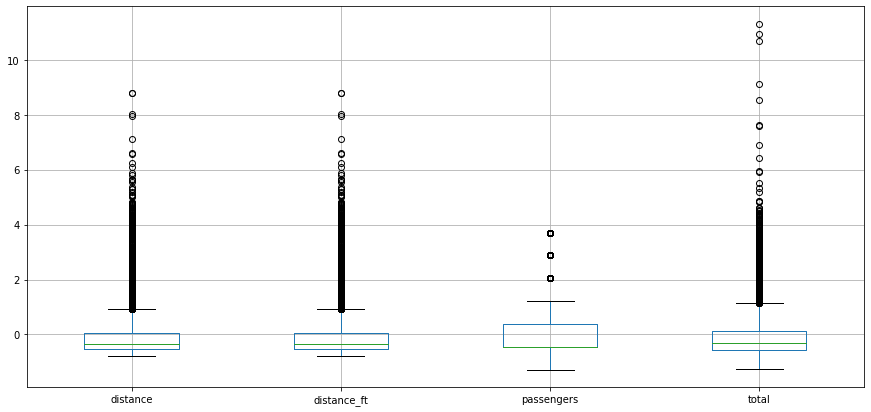

In [13]:
df_taxis_normalized.boxplot(figsize=(15,7)) 
plt.show()

- Notice what happens to distance vs. distance_ft when normalized!
- Note that the $R^2$ below did not change, but the coefficients did.

In [14]:
model = ols(formula = 'distance_ft ~ total + passengers', data=df_taxis_normalized)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            distance_ft   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                 1.449e+04
Date:                Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:00:35   Log-Likelihood:                -3639.2
No. Observations:                6433   AIC:                             7284.
Df Residuals:                    6430   BIC:                             7305.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    6.64e-14      0.005   1.25e-11      1.000      -0.010       0.010
total          0.9048      0.005    170.254      0.000       0.894       0.915
passengers    -0.0048      0.005     -0.903      0.366      -0.015       0.006
==============================================================================
Omnibus:                     6966.038   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2963579.447
Skew:                          -4.832   Prob(JB):                         0.00
Kurtosis:                     107.704   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You can also do min-max normalization to put everything on a $[0,1]$ scale.

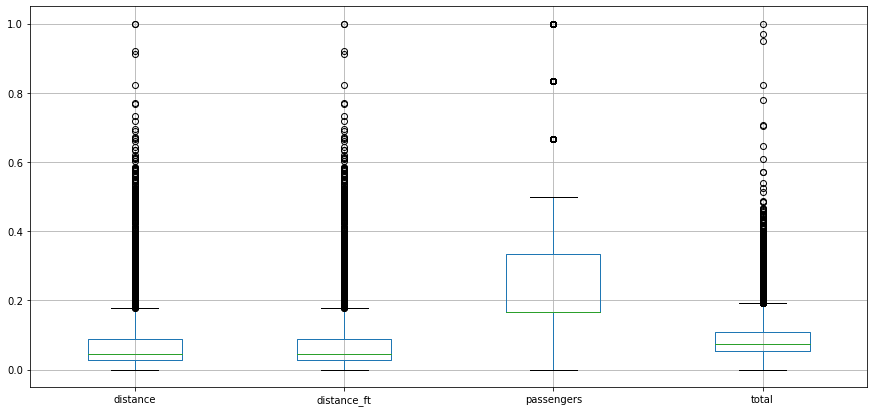

In [15]:
df = df_taxis.copy()[['distance', 'distance_ft', 'passengers', 'total']]
df_taxis_normalized = (df - df.min()) / (df.max() - df.min())
df_taxis_normalized.boxplot(figsize=(15,7)) 
plt.show()

### WARNING
- If we do a train-test split why is it data leakage to normalize the variables against the *entire* dataset??
- Always remember to use the same normalization method/parameters at prediction time!

### Ridge Regression

- Idea: Add a penalty term to the loss function. For example when there are $N$ datapoints and $n$ independent variables.

$$
\begin{align}
\mathcal{L} &= \left(\sum_{i=1}^N (y_i - \hat{y}_i)^2\right) + \lambda \left(\sum_{i=0}^n \beta_i^2\right)\\
&= RSS + \lambda ||\beta||_2^2
\end{align}
$$
- Here $\lambda$ controls the magnitude of the penalty

In [16]:
df_pen = sns.load_dataset('penguins').dropna().reset_index(drop=True)
df_pen.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [17]:
train, val = train_test_split(df_pen, test_size=0.95, random_state=2022)

In [18]:
# normalize the numerical columns
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    
    train_mean = train[col].mean()
    train_std = train[col].std()
    
    train[col] = ((train[col] - train_mean) / train_std)
    val[col] = ((val[col] - train_mean) / train_std)

train.head()

<ipython-input-18-14c0b8fab4c9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = ((train[col] - train_mean) / train_std)
<ipython-input-18-14c0b8fab4c9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val[col] = ((val[col] - train_mean) / train_std)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
48,Adelie,Biscoe,-1.432964,0.343659,-0.963697,-1.515643,Female
126,Adelie,Dream,-1.082578,0.559288,-0.574979,-0.863900,Female
147,Chinstrap,Dream,0.928332,1.098360,-0.380620,-0.429404,Male
11,Adelie,Torgersen,-0.793129,0.828824,-0.445406,-0.918212,Female
283,Gentoo,Biscoe,0.379902,-1.004022,1.239039,0.765459,Male


In [21]:
# An Aside: see what happens if I give the model a categorical variable
model = ols(formula = 'bill_depth_mm ~ bill_length_mm + flipper_length_mm + body_mass_g', data=train)
res = model.fit()
res.summary()

/Users/mruddy/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bill_depth_mm   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     10.97
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           0.000938
Time:                        20:29:16   Log-Likelihood:                -11.630
No. Observations:                  16   AIC:                             31.26
Df Residuals:                      12   BIC:                             34.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          8.882e-16      0.144   6.15e-15      1.000      -0.315       0.315
bill_length_mm        0.8879      0.218      4.064      0.002       0.412       1.364
flipper_length_mm    -0.6950      0.303     -2.291      0.041      -1.356      -0.034
body_mass_g          -0.6009      0.309     -1.945      0.076      -1.274       0.072
==============================================================================
Omnibus:                        0.087   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.102
Skew:                           0.087   Prob(JB):                        0.950
Kurtosis:                       2.650   Cond. No.                         4.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
y_pred = res.predict(val)

# score the model
y = val['bill_depth_mm']
y_mean = train['bill_depth_mm'].mean()  # use the mean of the training set

TSS = sum((y - y_mean)**2)
RSS = sum((y - y_pred)**2)
print(f'This model has an R^2 on the validation set of {(TSS - RSS) / TSS}')

This model has an R^2 on the validation set of 0.11590825129463911


In [23]:
# very small training set
len(train)

16

In [24]:
# remember there is some multicolinearity as well
df_pen.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [25]:
# sklearn has a nice ridge regression model
from sklearn.linear_model import Ridge

x_train = train[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
y_train = train['bill_depth_mm']

model = Ridge(alpha=10.0)
model.fit(x_train,y_train)

y_pred = model.predict(x_train)

# score the model
r2 = model.score(x_train, y_train)
print(f'This model has an R^2 on the train set of {r2}')

This model has an R^2 on the train set of 0.4910578182329578


In [26]:
x_val = val[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
y_val = val['bill_depth_mm']

r2 = model.score(x_val, y_val)
print(f'This model has an R^2 on the validation set of {r2}')

This model has an R^2 on the validation set of 0.23964943707951614


In [27]:
# also known as hyperparamter tuning
for alpha in [0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100]:
    
    # create and evaluate the model for different values of alpha
    model = Ridge(alpha=alpha)
    model.fit(x_train,y_train)
    r2 = model.score(x_val, y_val)
    
    print(f'This model has an R^2 on the validation set of {r2} when alpha is {alpha}')

This model has an R^2 on the validation set of 0.09476117403239148 when alpha is 0.01
This model has an R^2 on the validation set of 0.1038674945197876 when alpha is 0.1
This model has an R^2 on the validation set of 0.1381191796876503 when alpha is 0.5
This model has an R^2 on the validation set of 0.16979312959088322 when alpha is 1
This model has an R^2 on the validation set of 0.20931533042689754 when alpha is 2
This model has an R^2 on the validation set of 0.24630092674900117 when alpha is 5
This model has an R^2 on the validation set of 0.23964943707951614 when alpha is 10
This model has an R^2 on the validation set of 0.2027708079344389 when alpha is 20
This model has an R^2 on the validation set of 0.1309288701467407 when alpha is 50
This model has an R^2 on the validation set of 0.07736114053495702 when alpha is 100


### Lasso Regression

- Idea: Add a different penalty term to the loss function. For example when there are $N$ datapoints and $n$ independent variables.

$$
\begin{align}
\mathcal{L} &= \left(\sum_{i=1}^N (y_i - \hat{y}_i)^2\right) + \lambda \left(\sum_{i=0}^n |\beta_0|\right)\\
&= RSS + \lambda ||\beta||_1
\end{align}
$$
- Here $\lambda$ controls the magnitude of the penalty

In [34]:
# sklearn has a nice ridge regression model
from sklearn.linear_model import Lasso

x_train = train[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
y_train = train['bill_depth_mm']

model = Lasso(alpha=0.1)
model.fit(x_train,y_train)

y_pred = model.predict(x_train)

# score the model
r2 = model.score(x_train, y_train)
print(f'This model has an R^2 on the train set of {r2}')

This model has an R^2 on the train set of 0.6453075447191425


In [35]:
x_val = val[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
y_val = val['bill_depth_mm']

r2 = model.score(x_val, y_val)
print(f'This model has an R^2 on the validation set of {r2}')

This model has an R^2 on the validation set of 0.24489651530555434


In [36]:
for alpha in [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]:
    
    # create and evaluate the model for different values of alpha
    model = Lasso(alpha=alpha)
    model.fit(x_train,y_train)
    r2 = model.score(x_val, y_val)
    
    print(f'This model has an R^2 on the validation set of {r2} when alpha is {alpha}')

This model has an R^2 on the validation set of 0.09599559254736767 when alpha is 0.001
This model has an R^2 on the validation set of 0.11591251546081482 when alpha is 0.01
This model has an R^2 on the validation set of 0.24489651530555434 when alpha is 0.1
This model has an R^2 on the validation set of 0.23855385430363185 when alpha is 0.2
This model has an R^2 on the validation set of 0.17929999979789302 when alpha is 0.3
This model has an R^2 on the validation set of 0.11547372706201209 when alpha is 0.4
This model has an R^2 on the validation set of 0.0301976900573111 when alpha is 0.5
This model has an R^2 on the validation set of -0.025104894537357314 when alpha is 1


### Ridge vs. Lasso

- Both apply a penalty based on the magnitude of the coefficients
- Ridge tends to lower the magnitude of all the coefficients somewhat equally
- Lasso tends to "zero out" some of the coefficients (often is used for feature selection)
- Check out this article [here](https://explained.ai/regularization/index.html) by Terence Parr, former Professor at USF who is now at Google.

In [40]:
# loop over many different alpha and see the coefficients
rows = []
for alpha in [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 1000000]:
    
    # create and evaluate the model for different values of alpha
    model = Ridge(alpha=alpha)
    model.fit(x_train,y_train)
    
    row = {'alpha': alpha,
           'intercept': model.intercept_}
    for i, coef in enumerate(model.coef_):
        row[f'beta_{i}'] = coef
    rows.append(row)
    
pd.DataFrame(rows)

,alpha,intercept,beta_0,beta_1,beta_2
0,0.0001,9.485442e-16,8.878810e-01,-0.694998,-0.600856
1,0.0010,9.485365e-16,8.877044e-01,-0.694899,-0.600780
2,0.0100,9.484595e-16,8.859416e-01,-0.693902,-0.600027
3,0.1000,9.477055e-16,8.686485e-01,-0.684131,-0.592608
4,0.5000,9.446604e-16,7.985149e-01,-0.644605,-0.562051
5,1.0000,9.414392e-16,7.238198e-01,-0.602533,-0.528718
6,2.0000,9.364142e-16,6.062344e-01,-0.535860,-0.474592
7,5.0000,9.275779e-16,3.952564e-01,-0.412041,-0.370997
8,10.0000,9.211473e-16,2.348840e-01,-0.308551,-0.281938
9,20.0000,9.167635e-16,1.146103e-01,-0.214944,-0.199335


In [39]:
# loop over many different alpha and see the coefficients
rows = []
for alpha in [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 1]:
    
    # create and evaluate the model for different values of alpha
    model = Lasso(alpha=alpha)
    model.fit(x_train,y_train)
    
    row = {'alpha': alpha,
           'intercept': model.intercept_}
    for i, coef in enumerate(model.coef_):
        row[f'beta_{i}'] = coef
    rows.append(row)
    
pd.DataFrame(rows)

,alpha,intercept,beta_0,beta_1,beta_2
0,0.0001,9.485348e-16,0.887565,-0.694958,-0.600563
1,0.0010,9.483911e-16,0.883950,-0.693244,-0.598511
2,0.0100,9.469540e-16,0.847804,-0.676108,-0.577993
3,0.1000,9.325841e-16,0.486343,-0.504753,-0.372802
4,0.2000,9.166187e-16,0.084733,-0.314386,-0.144798
5,0.3000,9.145054e-16,0.000000,-0.229060,-0.051472
6,0.4000,9.159340e-16,0.000000,-0.166759,-0.000000
7,0.5000,9.159340e-16,0.000000,-0.060093,-0.000000
8,1.0000,9.159340e-16,-0.000000,-0.000000,-0.000000


### Cross-Validation

- How do we find the best alpha? What if our choice of validation set biased which alpha was the best?
- How do we get a less biased estimation of a metric?
- Idea: Split the data into disjoint pieces, then train on the complement of the piece and score on the piece.
- $k$-fold CV: Split data into $k$ equal pieces. Create and score $k$ models.

In [41]:
# let's do 9-fold cross-validation with basic Linear Regression
from sklearn.linear_model import LinearRegression

# shuffle the data
df = df_pen.sample(frac=1, random_state=2020)

rows = []
for i in range(9):
    
    # 9 equal splits 
    val = df[i*(37):(i+1)*37]
    train = df[~df.index.isin(val.index)]
    
    x_train = train[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
    y_train = train['bill_depth_mm']
    
    x_val = val[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
    y_val = val['bill_depth_mm']

    model = LinearRegression()
    model.fit(x_train, y_train)
    
    r2 = model.score(x_val, y_val)
    print(r2)
    row = {'R^2' : model.score(x_val, y_val)}
    rows.append(row)
    
df = pd.DataFrame(rows)
print('The Average R^2 is', df['R^2'].mean())

0.5131815104371009
0.32234824085998137
0.34727179657781915
0.29140240195343603
0.39009446310927154
0.1651995303527808
0.3611257800664066
0.3226378567002547
0.3288532533096421
The Average R^2 is 0.3380127592629659


In [46]:
from sklearn.model_selection import GridSearchCV

model = Ridge()

# can pass other parameters as well here!
params = {'alpha' : [0.001, 0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]}

# define the search
search = GridSearchCV(model, params, scoring='r2', cv=9)

# shuffle the data, GridSearch does not shuffle
df = df_pen.sample(frac=1, random_state=2020)
x = df[['bill_length_mm', 'flipper_length_mm', 'body_mass_g']]
y = df['bill_depth_mm']

# execute search
result = search.fit(x, y)

In [47]:
result.best_score_, result.best_params_

(0.33882702720102115, {'alpha': 500})

- How many models did the above grid search create?